In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore

In [2]:
# 2. Load the dataset
df = pd.read_csv('./spg.csv')

In [3]:
# Check for missing values 
print(df.isnull().sum())

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64


In [4]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


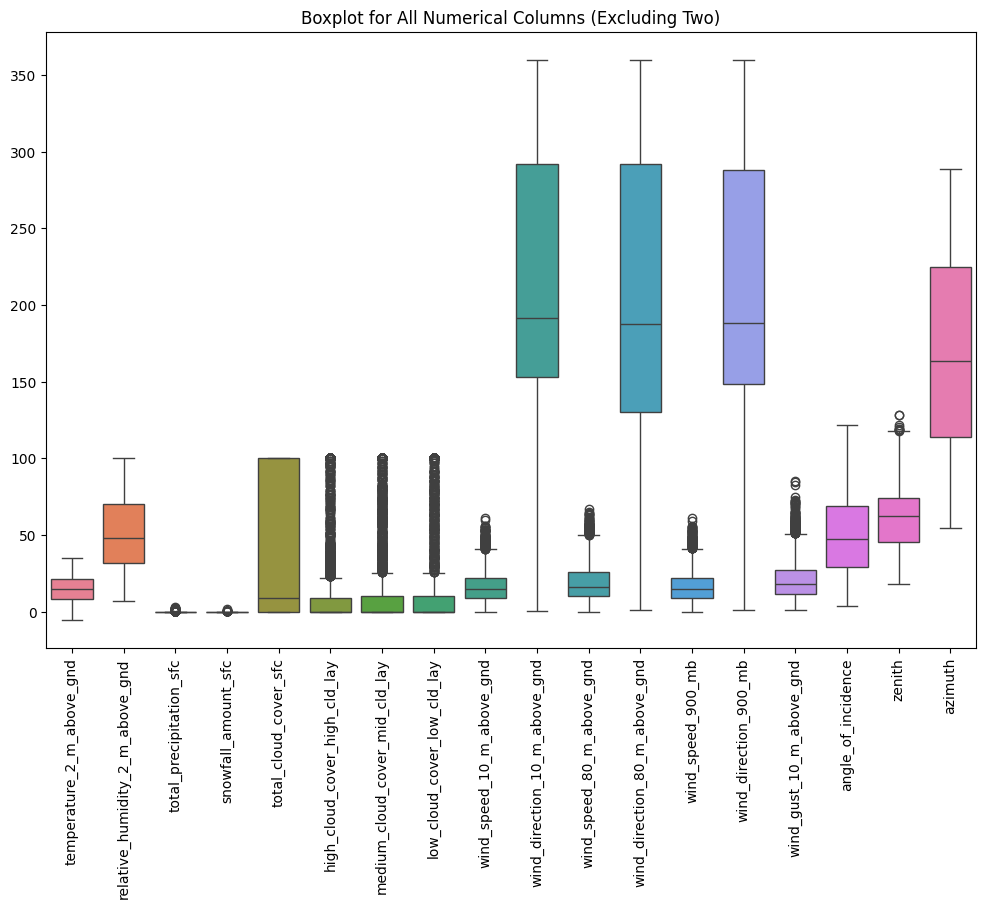

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the columns you want to exclude
df_filtered = df.drop(columns=['shortwave_radiation_backwards_sfc', 'generated_power_kw' , 'mean_sea_level_pressure_MSL'])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot for the remaining numerical columns
sns.boxplot(data=df_filtered)

# Set the title of the plot
plt.title('Boxplot for All Numerical Columns (Excluding Two)')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for readability
plt.show()


# Remove outliers

In [6]:
columns_to_clean = ['high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay', 'wind_speed_80_m_above_gnd' , 'total_precipitation_sfc' ,  'total_cloud_cover_sfc' , 'relative_humidity_2_m_above_gnd' , 'wind_speed_80_m_above_gnd' , 'wind_gust_10_m_above_gnd' , 'generated_power_kw']  # Replace with your actual column names

for col in columns_to_clean:
    # Clip negative values
    df[col] = df[col].clip(lower=0)
    
    # Calculate IQR and remove outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



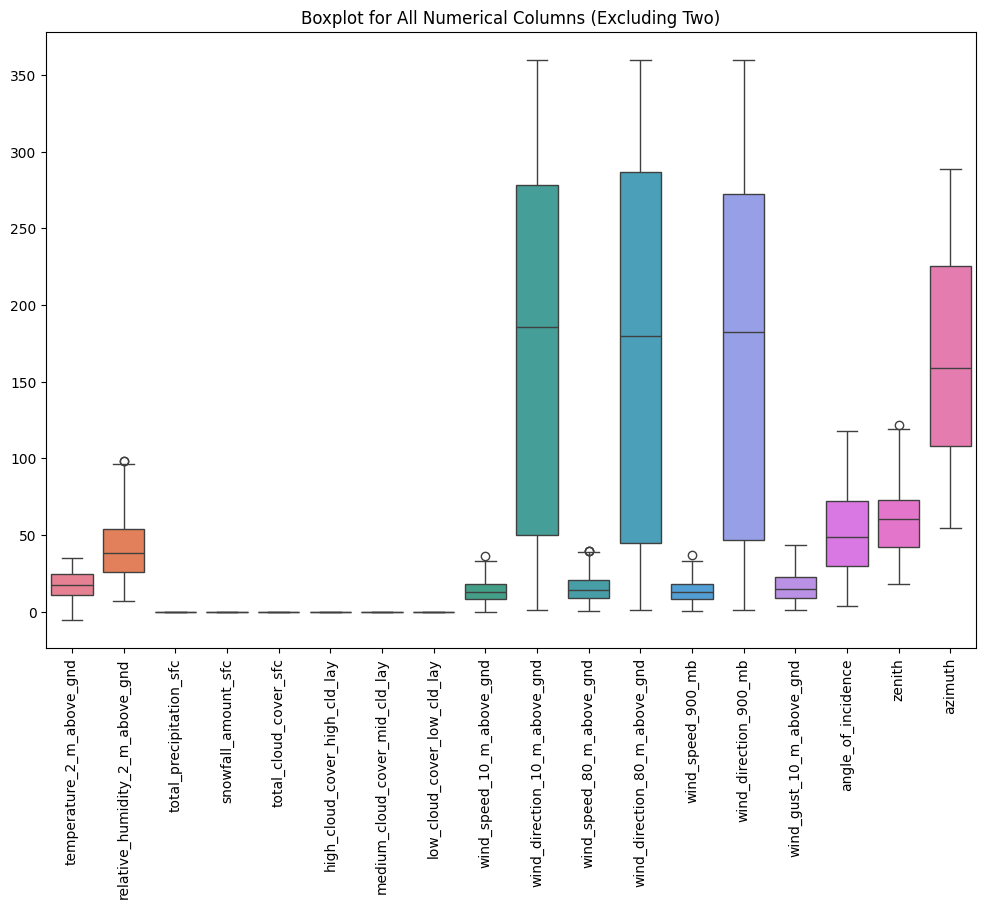

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the columns you want to exclude
df_filtered = df.drop(columns=['shortwave_radiation_backwards_sfc', 'generated_power_kw' , 'mean_sea_level_pressure_MSL'])

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot for the remaining numerical columns
sns.boxplot(data=df_filtered)

# Set the title of the plot
plt.title('Boxplot for All Numerical Columns (Excluding Two)')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for readability
plt.show()


In [8]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,1617.000000,1617.000000,1617.000000,1617.0,1617.0,1617.0,1617.0,1617.0,1617.0,1617.000000,...,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,17.544960,42.209029,1020.815399,0.0,0.0,0.0,0.0,0.0,0.0,468.562158,...,182.535195,15.300489,181.114051,13.404879,179.351800,16.174620,51.838552,57.796592,167.084608,1456.315728
std,8.812308,20.389665,6.833634,0.0,0.0,0.0,0.0,0.0,0.0,296.917350,...,111.853301,8.676906,113.962324,6.986445,111.366115,8.989042,26.527609,20.554096,66.692106,968.328895
min,-5.350000,7.000000,1008.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.270000,0.360000,1.120000,0.360000,1.120000,0.720000,3.766725,17.730682,54.379093,0.000595
25%,11.060000,26.000000,1015.700000,0.0,0.0,0.0,0.0,0.0,0.0,241.190000,...,50.080000,8.670000,45.000000,8.090000,46.910000,9.000000,29.956204,42.361997,107.855930,499.905830
50%,17.360000,38.000000,1019.200000,0.0,0.0,0.0,0.0,0.0,0.0,490.390000,...,185.830000,14.170000,180.000000,12.680000,182.600000,14.760000,48.566224,60.126952,158.740030,1688.556900
75%,24.350000,54.000000,1025.600000,0.0,0.0,0.0,0.0,0.0,0.0,722.680000,...,278.130000,20.880000,286.990000,18.060000,272.290000,22.680000,72.217080,73.039696,225.251970,2366.957500
max,34.810000,98.000000,1046.800000,0.0,0.0,0.0,0.0,0.0,0.0,952.300000,...,360.000000,39.280000,360.000000,36.640000,360.000000,43.200000,117.781350,121.463180,288.924270,3056.794100


In [9]:
# Calculate the correlation
correlation = df['snowfall_amount_sfc'].corr(df['generated_power_kw'])
print("Correlation:", correlation)

df.drop(columns=['snowfall_amount_sfc' ], inplace=True)

Correlation: nan


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [10]:
# Split features (X) and target (y)
X = df.drop(columns=['generated_power_kw'])
y = df['generated_power_kw']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=15)


In [12]:
# 6. Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Build the model
# it is better to have a deeper network than to have a wider network (more layers is better than more neurons in each layer)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dropout(0.2),
    Dense(300, activation='relu'),
    Dropout(0.2),
    Dense(300, activation='relu'),
    Dropout(0.2),
    Dense(300, activation='relu'),
    Dense(1)
])

d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [15]:
# 9. Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=60,
    batch_size=35,
)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2558854.7500 - mae: 1324.4967 - val_loss: 528799.1875 - val_mae: 620.1740
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 475316.3125 - mae: 570.0033 - val_loss: 253890.7344 - val_mae: 392.5114
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 292196.4062 - mae: 411.1679 - val_loss: 285390.8125 - val_mae: 425.5027
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 260104.5469 - mae: 390.6811 - val_loss: 205805.0469 - val_mae: 336.0807
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 217893.2344 - mae: 335.1478 - val_loss: 172711.5938 - val_mae: 294.9849
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 216464.7500 - mae: 325.0168 - val_loss: 147640.1406 - val_mae: 269.6535
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 211230.9688 - mae: 318.6356 - val_loss: 148646.0469 - val_mae: 261.3758
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 180656.5625 - mae: 288.2917

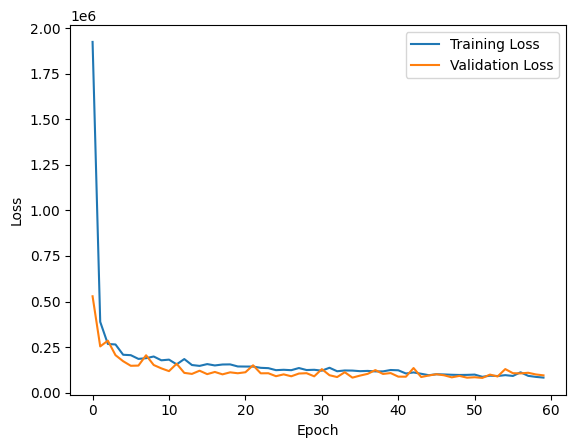

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


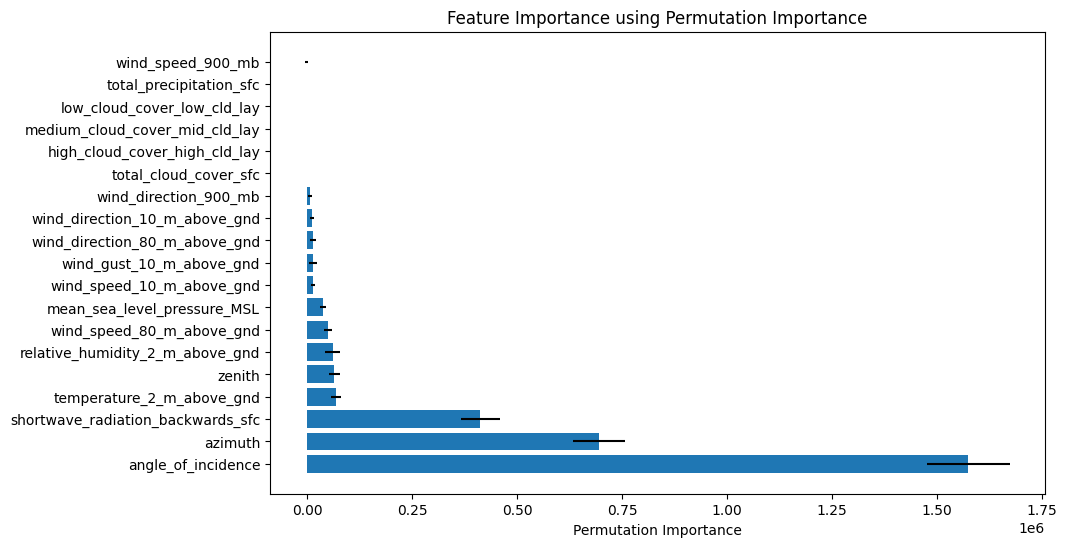

In [17]:
# Compute Permutation Importance
from sklearn.inspection import permutation_importance


result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Extract the importance values
importance_values = result.importances_mean
std_dev = result.importances_std

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_values,
    'Standard Deviation': std_dev
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], xerr=feature_importance_df['Standard Deviation'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance using Permutation Importance')
plt.show()

Accessing weights and biases for Dense layer 0: dense


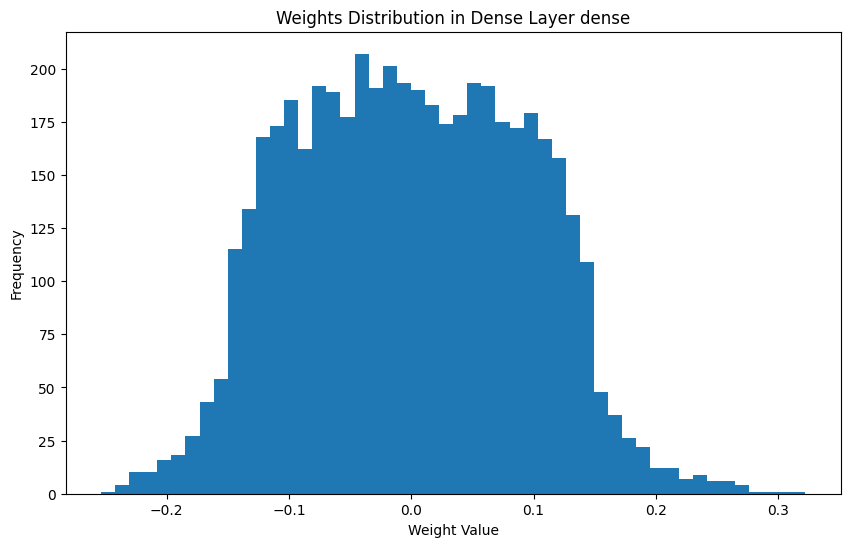

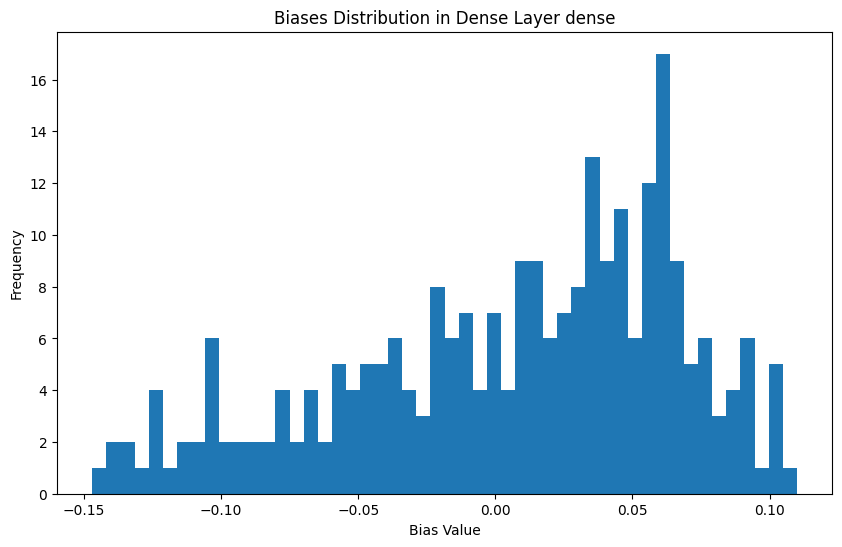

Accessing weights and biases for Dense layer 1: dense_1


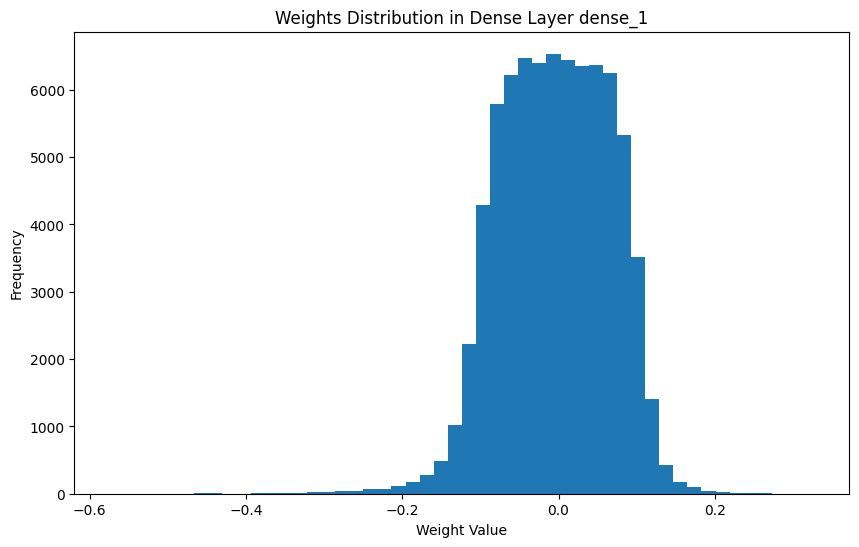

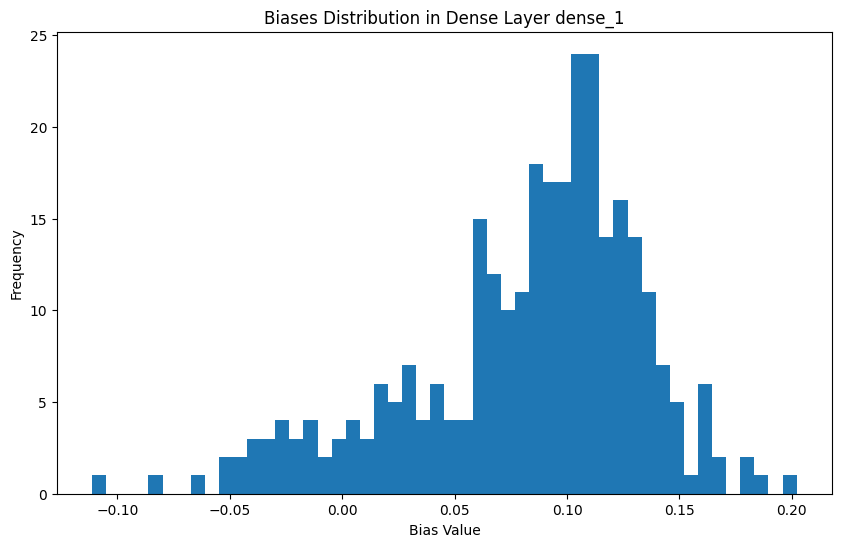

Accessing weights and biases for Dense layer 2: dense_2


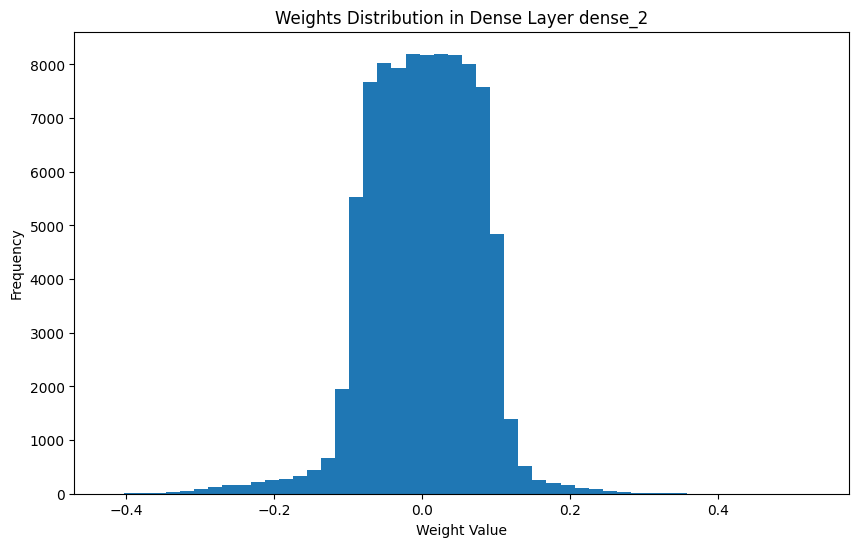

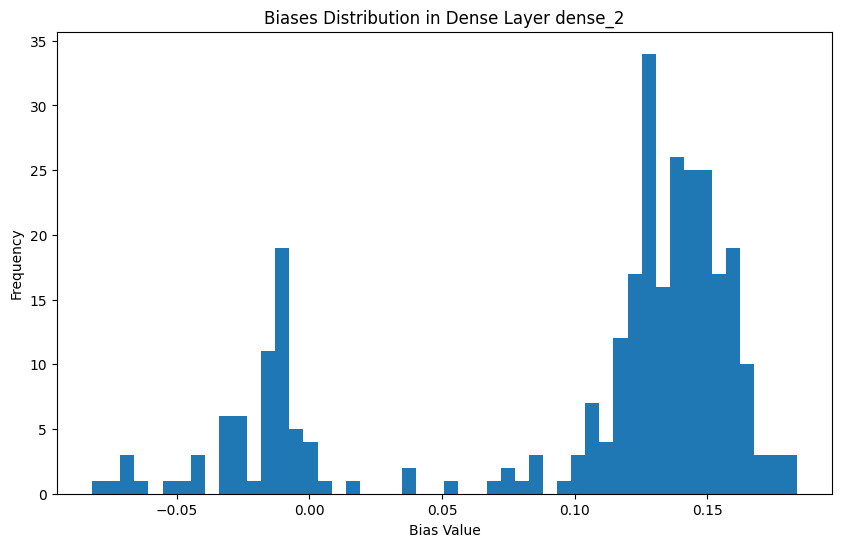

Accessing weights and biases for Dense layer 3: dense_3


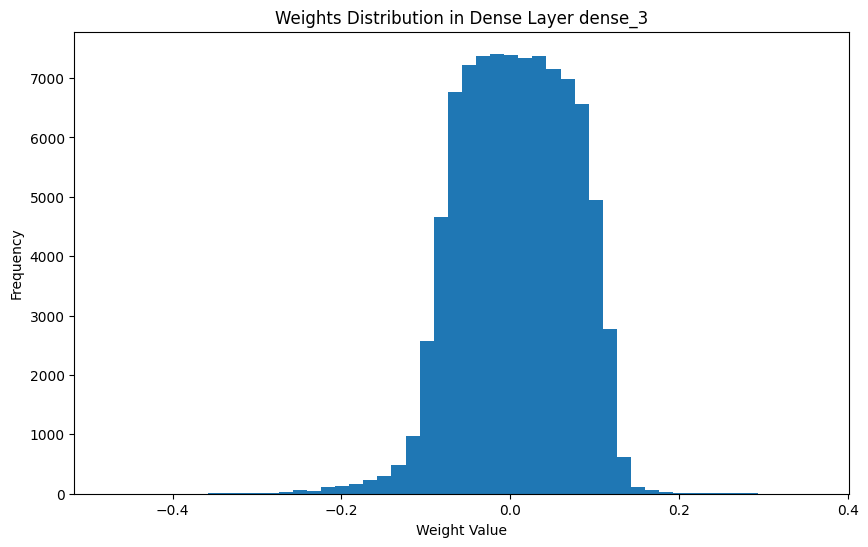

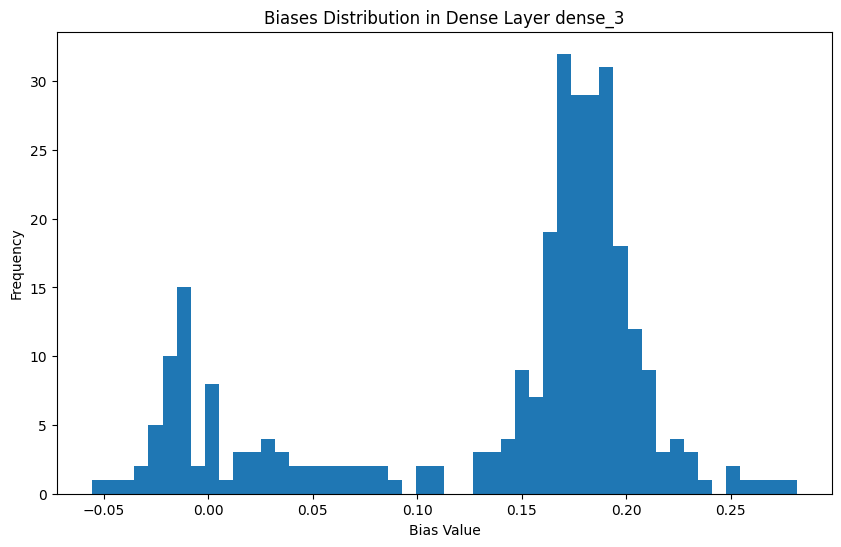

Accessing weights and biases for Dense layer 4: dense_4


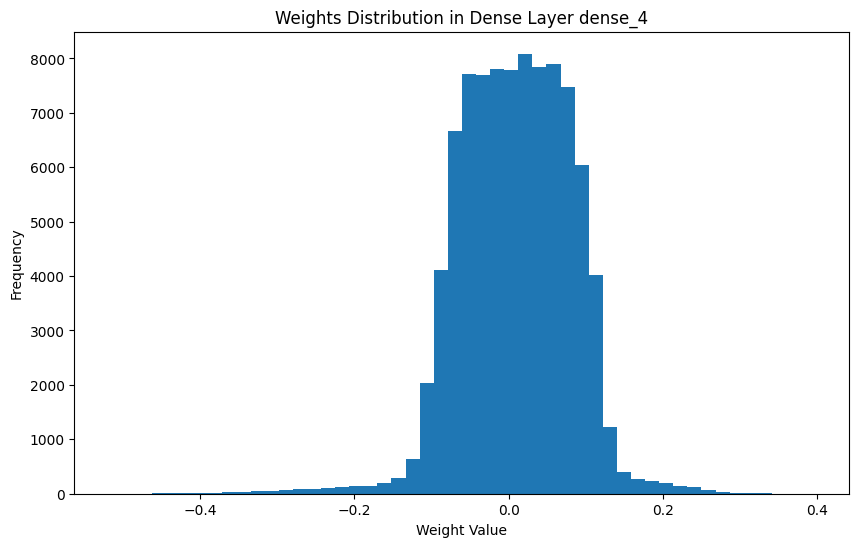

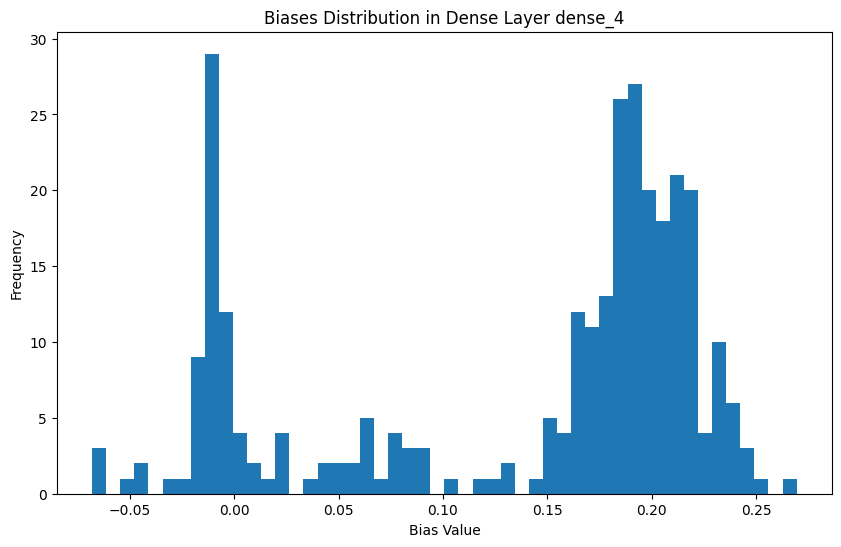

Accessing weights and biases for Dense layer 5: dense_5


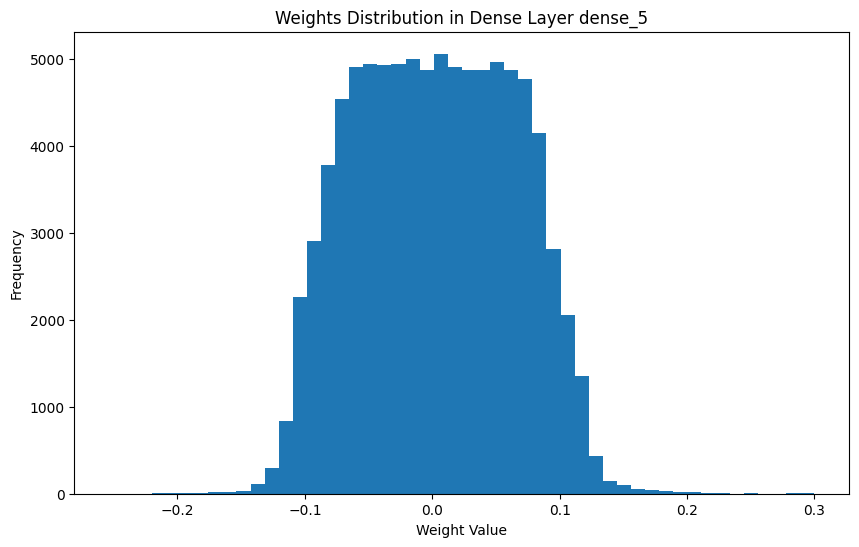

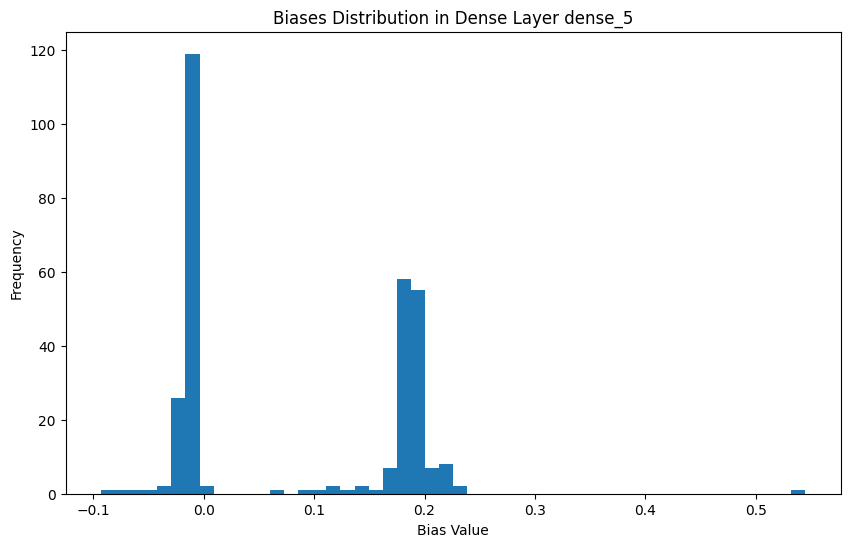

Accessing weights and biases for Dense layer 6: dense_6


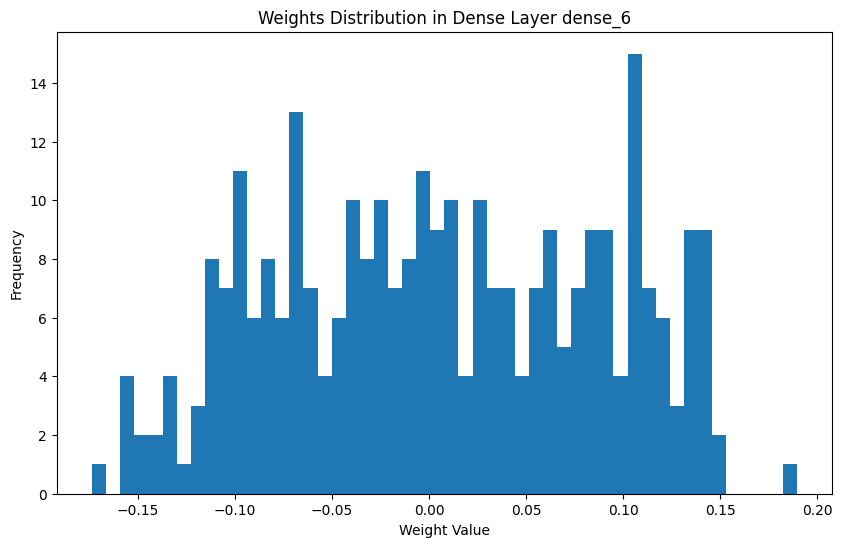

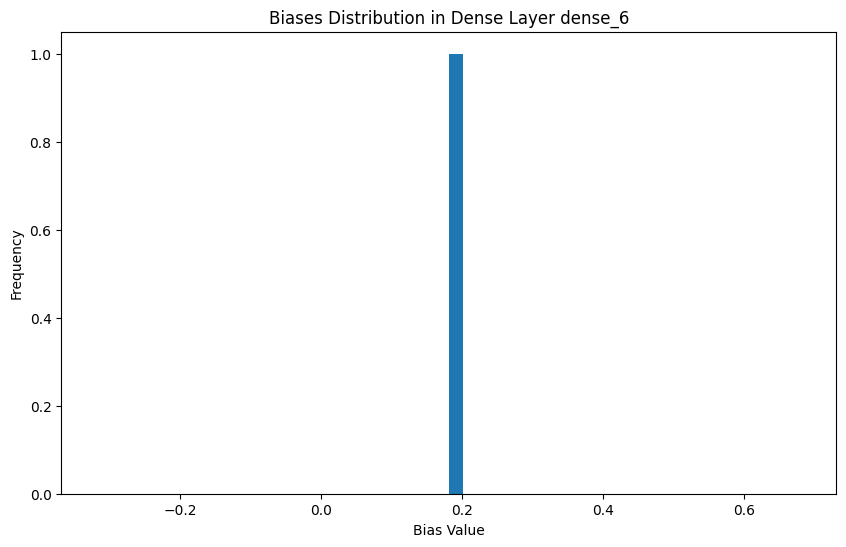

In [18]:
# Initialize a counter for Dense layers
dense_layer_idx = 0

for idx, layer in enumerate(model.layers):
    if isinstance(layer, Dense):  # Only process Dense layers
        print(f"Accessing weights and biases for Dense layer {dense_layer_idx}: {layer.name}")
        
        try:
            weights, biases = layer.get_weights()  # Get weights and biases for Dense layer
            
            # Visualizing the weights
            plt.figure(figsize=(10, 6))
            plt.hist(weights.flatten(), bins=50)
            plt.title(f'Weights Distribution in Dense Layer {layer.name}')
            plt.xlabel('Weight Value')
            plt.ylabel('Frequency')
            plt.show()

            # Visualizing the biases
            plt.figure(figsize=(10, 6))
            plt.hist(biases.flatten(), bins=50)
            plt.title(f'Biases Distribution in Dense Layer {layer.name}')
            plt.xlabel('Bias Value')
            plt.ylabel('Frequency')
            plt.show()

            # Increment the counter for Dense layers
            dense_layer_idx += 1

        except ValueError:
            print(f"Layer {layer.name} does not have weights or biases.")


In [19]:
from tensorflow.keras.optimizers import Adam  # type: ignore
from sklearn.metrics import mean_squared_error  # Evaluation metric to assess model performance
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, Dropout  # type: ignore
  # To stop training early if performance stagnates

# Define the model-building function with tunable hyperparameters
def build_model(dropout_rate_1=0.2, dropout_rate_2=0.3, neurons_1=128, neurons_2=64):
    # Define the model with specific dropout rates for each layer
    model = Sequential([
        Dense(neurons_1, activation='relu', input_shape=(X_train.shape[1],)),  # First layer with neurons_1
        Dropout(dropout_rate_1),  # Dropout rate for the first layer
        Dense(300, activation='relu'),  # Second layer with 300 neurons
        Dropout(dropout_rate_1),  # Dropout for the second layer
        Dense(300, activation='relu'),  # Third layer with 300 neurons
        Dropout(dropout_rate_1),  # Dropout for the third layer
        Dense(300, activation='relu'),  # Fourth layer with 300 neurons
        Dropout(dropout_rate_2),  # Dropout for the fourth layer
        Dense(300, activation='relu'),  # Fifth layer with 300 neurons
        Dropout(dropout_rate_2),  # Dropout for the fifth layer
        Dense(1)  # Output layer with a single neuron (for regression)
    ])

    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model


# Define the hyperparameter grid
dropout_rates_1 = [0.2, 0.3, 0.4]  # Dropout for the first layers
dropout_rates_2 = [0.3, 0.4, 0.5]  # Dropout for the later layers
neurons_1 = [128, 256]  # Number of neurons for the initial layers
neurons_2 = [64, 128]   # Number of neurons for subsequent layers
batch_sizes = [32, 64]  # Batch sizes for training
epochs = [50, 100]      # Number of epochs to train the model

# Store the results
results = []

# Manually search through combinations of hyperparameters
for dr1 in dropout_rates_1:
    for dr2 in dropout_rates_2:
        for n1 in neurons_1:
            for n2 in neurons_2:
                for batch_size in batch_sizes:
                    for epoch in epochs:
                        print(f"Training with dr1={dr1}, dr2={dr2}, n1={n1}, n2={n2}, batch_size={batch_size}, epochs={epoch}")

                        # Build and train the model with early stopping
                        model = build_model(dropout_rate_1=dr1, dropout_rate_2=dr2, neurons_1=n1, neurons_2=n2)

                        # Train the model with early stopping and validation data
                        history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, verbose=0,
                                            validation_data=(X_test, y_test))

                        # Evaluate the model
                        y_pred = model.predict(X_test)
                        mse = mean_squared_error(y_test, y_pred)

                        # Save the result
                        results.append((dr1, dr2, n1, n2, batch_size, epoch, mse))

# Find the best combination of hyperparameters (minimize MSE)
best_params = min(results, key=lambda x: x[6])  # MSE is the 7th element in the tuple (index 6)
print(f"Best Hyperparameters: dr1={best_params[0]}, dr2={best_params[1]}, n1={best_params[2]}, n2={best_params[3]}, batch_size={best_params[4]}, epochs={best_params[5]}")
print(f"Best MSE: {best_params[6]}")


Training with dr1=0.2, dr2=0.3, n1=128, n2=64, batch_size=32, epochs=50


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
Training with dr1=0.2, dr2=0.3, n1=128, n2=64, batch_size=32, epochs=100


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with dr1=0.2, dr2=0.3, n1=128, n2=64, batch_size=64, epochs=50


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training with dr1=0.2, dr2=0.3, n1=128, n2=64, batch_size=64, epochs=100


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training with dr1=0.2, dr2=0.3, n1=128, n2=128, batch_size=32, epochs=50


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training with dr1=0.2, dr2=0.3, n1=128, n2=128, batch_size=32, epochs=100


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [20]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae:.2f}")

Mean Absolute Error on Test Data: 201.20


In [21]:
# Predict on the test set
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [22]:
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")

R2 Score: 0.91


In [23]:
# 11. Predict generated power for new data
sample_input = scaler.transform([[25, 60, 1015, 0.1, 50, 20, 30, 10, 200, 5, 7, 4, 10, 45, 30, 150, 45, 80, 200]])
predicted_power = model.predict(sample_input)
print(f"Predicted Generated Power: {predicted_power[0][0]:.2f} kW")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Generated Power: 4368.13 kW


d:\FCAI\LVL 4\Data science\solar energy generation regression\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
